Import necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Load the employee data

In [4]:
data = pd.read_csv('employee_data.csv')

Split the data into training and validation sets (50% split)

In [5]:
train_data, val_data = train_test_split(data, test_size=0.5, random_state=42)

# Display the number of rows in each dataset
print(f'Total rows: {len(data)}')
print(f'Training rows: {len(train_data)}')
print(f'Validation rows: {len(val_data)}')

# Save the split datasets into new CSV files
train_data.to_csv('train_employee_data.csv', index=False)
val_data.to_csv('val_employee_data.csv', index=False)

Total rows: 400
Training rows: 200
Validation rows: 200


STD and Distribution

In [6]:
df = pd.read_csv('./train_employee_data.csv')
df 

,ID,Gender,Experience (Years),Position,Salary
0,184,F,4,Database Administrator (DBA),108860
1,204,F,14,Web Developer,148073
2,284,F,10,DevOps Engineer,130002
3,212,F,6,IT Support Specialist,78006
4,283,F,12,Web Developer,112825
...,...,...,...,...,...
195,72,F,5,Cloud Solutions Architect,110321
196,107,M,6,IT Security Analyst,135066
197,271,F,7,IT Manager,115263
198,349,M,9,Systems Administrator,115769


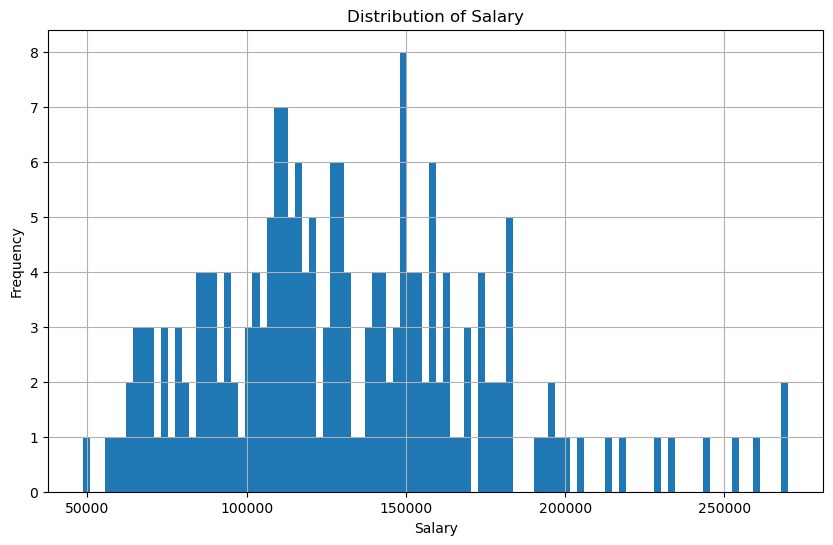

In [7]:
#Calculate and visualize the distribution of the 'Salary' variable
plt.figure(figsize=(10, 6))
df['Salary'].hist(bins=100)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.show()

Train model

In [11]:
categorical = ['Gender', 'Position']
numerical = ['Experience (Years)']
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

num_columns = X_train.shape[1]
print("Number of columns in the feature matrix:", num_columns)

target = 'Salary'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)



Number of columns in the feature matrix: 14


23715.209071728856

Validate model

In [12]:

df_val = pd.read_csv('./val_employee_data.csv')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

X_val = dv.transform(val_dicts)

y_val = df_val[target].values

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)


26234.270761334956